# Intro
Exploratory notebook related to linear algebra theory and applications.

Examples from [Computational Linear Algebra for Coders](https://github.com/fastai/numerical-linear-algebra/blob/master/README.md)

**Linear Algebra**: "concerning vectors, their properties, mappings and operations"

A **tensor** is the generalization of an array with N axes (dimensions). A 0-Dimensional tensor is a **scalar**, a 1-D tensor is a **vector** and a 2-D tensor is a **matrix**.

In [1]:
import numpy as np

In [2]:
scalar = np.random.randint(10)
#print(scalar.shape) # scalar is an int object, not a numpy array
scalar

2

In [3]:
vector = np.random.randint(10, size=2)
print(vector.shape)
vector

(2,)


array([9, 4])

In [4]:
matrix = np.random.randint(10, size=(2, 2))
print(matrix.shape)


(2, 2)


# Floating Point Arithmetic
Simple demonstration of how floating point arithmetic can differ from the pure mathematical model.

In [5]:
def f(x):
    if x<=1/2:
        return x*2
    if x>1/2:
        return x*2-1

In [6]:
x = 1/10
for i in range(80):
    print(x)
    x = f(x)

0.1
0.2
0.4
0.8
0.6000000000000001
0.20000000000000018
0.40000000000000036
0.8000000000000007
0.6000000000000014
0.20000000000000284
0.4000000000000057
0.8000000000000114
0.6000000000000227
0.20000000000004547
0.40000000000009095
0.8000000000001819
0.6000000000003638
0.2000000000007276
0.4000000000014552
0.8000000000029104
0.6000000000058208
0.20000000001164153
0.40000000002328306
0.8000000000465661
0.6000000000931323
0.20000000018626451
0.40000000037252903
0.8000000007450581
0.6000000014901161
0.20000000298023224
0.4000000059604645
0.800000011920929
0.6000000238418579
0.20000004768371582
0.40000009536743164
0.8000001907348633
0.6000003814697266
0.20000076293945312
0.40000152587890625
0.8000030517578125
0.600006103515625
0.20001220703125
0.4000244140625
0.800048828125
0.60009765625
0.2001953125
0.400390625
0.80078125
0.6015625
0.203125
0.40625
0.8125
0.625
0.25
0.5
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


# Matrix/Vector Multiplication

Example from [fastai](http://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra/blob/master/nbs/1.%20Why%20are%20we%20here.ipynb#Matrix-and-Tensor-Products)

In [7]:
X = np.array([0.85, 0.1, 0.05, 0.]).reshape(1, 4)

In [8]:
Y = np.array([[0.9, 0.07, 0.02, 0.01],
              [0, 0.93, 0.05, 0.02],
              [0, 0, 0.85, 0.15],
              [0, 0, 0, 1.]])

Using multiplication sign for numpy arrays is not equivalent to matrix multiplication, it instead relies on the concept of broadcasting.
Proper matrix multiplication can be obtained using `np.dot()` (or `@` in Python 3.x).

In [9]:
np.dot(X, Y)

array([[ 0.765 ,  0.1525,  0.0645,  0.018 ]])

In [10]:
X @ Y

array([[ 0.765 ,  0.1525,  0.0645,  0.018 ]])

In [11]:
X * Y

array([[ 0.765 ,  0.007 ,  0.001 ,  0.    ],
       [ 0.    ,  0.093 ,  0.0025,  0.    ],
       [ 0.    ,  0.    ,  0.0425,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ]])

# Norm
Norm is the size of a vector. More generally, p-norm (or $L^p$ norm) of $x$ is defined as 

$$ \left\|\mathbf {x} \right\|_{p}={\bigg (}\sum _{i=1}^{n}\left|x_{i}\right|^{p}{\bigg )}^{1/p} $$

1-norm = Manhattan norm, simplifies to absolute values sum

2-norm = euclidean norm, length or *magnitude* (distance from the origin to the point identified by $x$)

In [12]:
a = np.array([2,2])

In [13]:
# vector 1-norm
np.linalg.norm(a, ord=1)

4.0

In [14]:
# vector 2-norm
np.linalg.norm(a, ord=2)

2.8284271247461903

In [15]:
m = np.array([[5,3],[0,4]])

In [16]:
# matrix 1-norm
np.linalg.norm(m, ord=1)

7.0

In [17]:
# vector 2-norm
np.linalg.norm(m, ord=2)

6.324555320336759

A *normalized* vector (also known as unit vector) has unit length

$$ \left\|\mathbf {x} \right\|= 1 $$

To normalize a vector simply divide it by its norm.

In [18]:
a_len = np.linalg.norm(a, ord=2)
a_len

2.8284271247461903

In [19]:
a / a_len

array([ 0.70710678,  0.70710678])

In [20]:
np.linalg.norm(a / a_len, ord=2)

0.99999999999999989

# Broadcasting
Technique embedded in Numpy (and also other libraries) that allows to operate arithmetic operations between tensors of different shapes, by "broadcasting" the smaller array such as to obtain a compatible shape. 

In [21]:
a = np.array([1,2,3,4])
b = np.array([1,5])

In [22]:
a - 3

array([-2, -1,  0,  1])

In [23]:
a.reshape((4,1)) - 3

array([[-2],
       [-1],
       [ 0],
       [ 1]])

In [24]:
a.reshape((2,2)) - 3

array([[-2, -1],
       [ 0,  1]])

In [25]:
#a - b #cannot broadcast
a.reshape((4,1)) - b.reshape((1, 2)) # both a and b are broadcasted to 4x2

array([[ 0, -4],
       [ 1, -3],
       [ 2, -2],
       [ 3, -1]])

In [26]:
a.reshape((2, 2)) - b.reshape((1, 2))

array([[ 0, -3],
       [ 2, -1]])

# Points and Vectors
Geometric interpretation and exploration in 2D Euclidean space.

Despite being represented in the same way (e.g. ``p = (1, 2)``) a point and a vector are different geometric entities. A 2D point lives in 2D Euclidean space ($E^2$), a 2D vector lives in 2D linear space ($R^2$)

In [27]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

#%matplotlib notebook
%matplotlib inline

In [28]:
def draw_vector(draw, origin, vector, text=None, fill='black'):
    draw.line([tuple(origin), tuple(vector)], fill=fill)
    draw.text(tuple(vector), text, fill='black')

In [29]:
# setup PIL image and draw object
img_size = 300
img = Image.new('RGB', (img_size, img_size), (240, 240, 240))
draw = ImageDraw.Draw(img)

# draw elements on canvas
origin = np.array([0, 0])
p = np.array([150, 130])
q = np.array([45, 120])

# draw p
draw.point(p, fill='red')
draw_vector(draw, origin, p, 'p')
# draw q
draw.point(q, fill='red')
draw_vector(draw, origin, q, 'q')
# draw diff
diff_v = p - q
draw_vector(draw, origin, diff_v, 'p - q')
# draw sum
sum_v = p + q
draw_vector(draw, origin, sum_v, 'p + q')
# draw mean
draw_vector(draw, origin, np.mean([p, q], axis=0), 'mean \n(axis=0)')
draw_vector(draw, origin, np.mean([p, q], axis=1), 'mean \n(axis=1)')

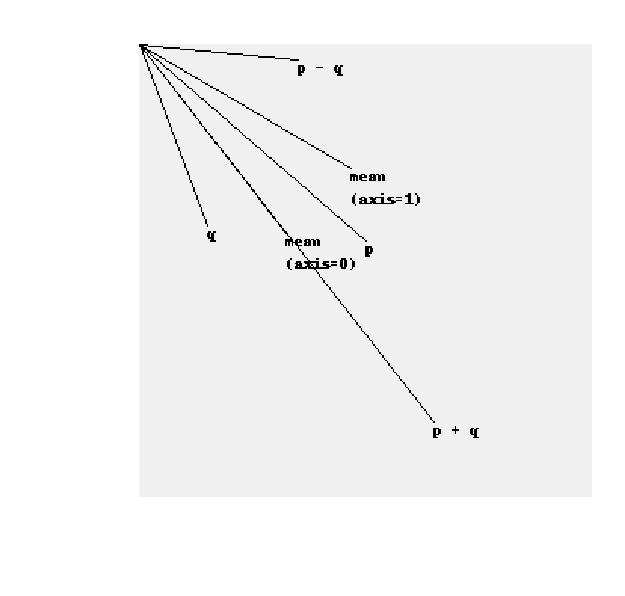

In [30]:
# Plot
fig, ax = plt.subplots(dpi=300, figsize=(2, 2))
canvas = ax.imshow(img)
plt.axis('off')
plt.show()